# Data visualization and preprocessing

This script generates all kinds of figures and pre-processes the data to a very limited extent (binarization of very rare features).

## Data loading

### Dataset loading

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import python_proj.utils.exp_utils as exp_utils

data_file_name = "dataset_90_days_started_11_07_23"

data_path_format = exp_utils.BASE_PATH + '/final_data/{data_file_name}.csv'
data_path = data_path_format.format(data_file_name=data_file_name)
print(f'{data_path=}')


df: pd.DataFrame = pd.read_csv(filepath_or_buffer=data_path, header=0)

print(f'{len(df)=}.')
print(f'{len(df.columns)=}\n')
print(f'{df.columns=}')

df.describe()


data_path='/workspaces/msc_thesis/data//final_data/dataset_90_days_started_11_07_23.csv'
len(df)=1815972.
len(df.columns)=92

df.columns=Index(['ID', 'Project Name', 'Submitter ID', 'PR Number', 'Closed At',
       'PullRequestIsMerged', 'SubmitterIsFirstTimeContributor',
       'ControlIntegratedBySameUser', 'ControlPullRequestLifeTimeInMinutes',
       'ControlPullRequestHasComments', 'ControlNumberOfCommitsInPullRequest',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In)',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In)',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In)',
       'FirstOrderDe

,ID,Submitter ID,PR Number,ControlPullRequestLifeTimeInMinutes,ControlNumberOfCommitsInPullRequest,FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In),FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In),FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In),FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In),FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In),...,IntraProjectSubmitterIssueCommentCount,SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator,SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter,SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter,EcosystemExperienceSubmitterIssueSubmissionCount,EcosystemExperienceSubmitterIssueCommentCount,DependencyEcosystemExperienceSubmitterIssueSubmissionCount,DependencyEcosystemExperienceSubmitterIssueCommentCount,InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount,InversedDependencyEcosystemExperienceSubmitterIssueCommentCount
count,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,...,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06
mean,1.474751e+08,5.198276e+06,3.807207e+03,3.190111e+04,4.947501e+00,4.264890e+01,1.382600e+01,1.539485e+01,1.021316e+01,1.022213e+01,...,2.256389e+01,5.859595e-01,4.025249e-01,7.930369e+00,2.615631e+00,1.785944e+01,1.743463e-01,8.645552e-01,1.854588e-01,1.355166e+00
std,1.004294e+08,8.100370e+06,8.071615e+03,1.399335e+05,7.283362e+01,2.501879e+03,3.539189e+02,4.735927e+02,3.782511e+02,2.043811e+02,...,7.182644e+01,3.476774e+00,3.021098e+00,7.431202e+01,7.985540e+00,6.700519e+01,1.580686e+00,1.186131e+01,2.446396e+00,1.667164e+01
min,6.870000e+02,1.000000e+00,1.000000e+00,1.666667e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.807322e+07,4.631570e+05,1.000000e+02,5.290000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.371940e+08,1.620265e+06,5.480000e+02,9.799167e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.278026e+08,6.384100e+06,2.817000e+03,7.328350e+03,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.617756e+08,5.976123e+07,8.297600e+04,4.489490e+06,1.000000e+04,3.461280e+05,8.789200e+04,1.227920e+05,1.095040e+05,4.764000e+04,...,2.755000e+03,2.570000e+02,2.190000e+02,1.951100e+04,2.332000e+03,7.630000e+03,3.730000e+02,9.270000e+02,7.410000e+02,2.764000e+03


### Meta stuff

In [2]:

from python_proj.utils.util import safe_save_fig

# The number of headers containing metadata; i.e., the stuff that's unusable for inference.
meta_header_count = 5
pr_merged_key = 'PullRequestIsMerged'
first_time_contributor_key = 'SubmitterIsFirstTimeContributor'

# Figures.
figure_base_path = f"{exp_utils.BASE_PATH}/figures/modelling/{data_file_name}/"

if not os.path.exists(figure_base_path):
    os.makedirs(figure_base_path)
print(f'{figure_base_path=}')


figure_base_path='/workspaces/msc_thesis/data//figures/modelling/dataset_90_days_started_11_07_23/'


### First-time contributors and Comments By External User

Adds the correct first-time contributor and comments by external user data to the dataframe as datasets generated with the ``sliding window 3`` code are by definition incorrect.

In [3]:

def replace(df1: pd.DataFrame, df2: pd.DataFrame, match_column: str, overwritten_column: str):
    print(f'\nOverwriting {overwritten_column}.')

    replace_data = df2[[match_column, overwritten_column]]

    old_counts = df1[overwritten_column].value_counts()
    print(f'Old/Incorrect:\n{old_counts}')

    df1 = df1.merge(replace_data, how='left', on=match_column,
                    suffixes=("_incorrect", ""))
    old_key = f'{overwritten_column}_incorrect'
    df1 = df1.drop(old_key, axis=1)

    new_counts = df1[overwritten_column].value_counts()
    print(f'\nNew:\n{new_counts}')

    diff = new_counts - old_counts
    print(f'\nDifference:\n{diff}')

    return df1


other_data_name = "dataset_90_days_started_28_06_23"
other_data_path = f'{exp_utils.BASE_PATH}/final_data/{other_data_name}.csv'
print(f'{other_data_path=}\n')

other_df: pd.DataFrame = pd.read_csv(other_data_path)

df = replace(df, other_df, 'ID', first_time_contributor_key)
df = replace(df, other_df, 'ID', 'ControlPullRequestHasCommentByExternalUser')


other_data_path='/workspaces/msc_thesis/data//final_data/dataset_90_days_started_28_06_23.csv'


Overwriting SubmitterIsFirstTimeContributor.
Old/Incorrect:
SubmitterIsFirstTimeContributor
False    1064835
True      751137
Name: count, dtype: int64

New:
SubmitterIsFirstTimeContributor
False    1293737
True      536234
Name: count, dtype: int64

Difference:
SubmitterIsFirstTimeContributor
False    228902
True    -214903
Name: count, dtype: int64

Overwriting ControlPullRequestHasCommentByExternalUser.
Old/Incorrect:
ControlPullRequestHasCommentByExternalUser
False    1206741
True      623230
Name: count, dtype: int64

New:
ControlPullRequestHasCommentByExternalUser
False    1292714
True      565255
Name: count, dtype: int64

Difference:
ControlPullRequestHasCommentByExternalUser
False    85973
True    -57975
Name: count, dtype: int64


### Shared experience

This field is overwritten as there was a mistake in the implementation.

In [4]:
import regex as re

other_data_name = "dataset_90_days_started_26_07_23"
other_data_path = f'{exp_utils.BASE_PATH}/final_data/{other_data_name}.csv'
print(f'{other_data_path=}\n')

other_df: pd.DataFrame = pd.read_csv(other_data_path)

shared_experience_fields = [field for field in df.columns[meta_header_count:]
                            if re.match(r'.*SharedExperience.*', field)]


for field in shared_experience_fields:
    df = replace(df, other_df, 'ID', field)


other_data_path='/workspaces/msc_thesis/data//final_data/dataset_90_days_started_26_07_23.csv'


Overwriting SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator.
Old/Incorrect:
SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator
0      1435141
1       132838
2        61703
3        38689
4        26728
        ...   
182          4
181          4
198          4
178          2
199          1
Name: count, Length: 200, dtype: int64

New:
SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator
0      1376939
1       125411
2        60559
3        39174
4        28494
        ...   
426          1
427          1
428          1
429          1
554          1
Name: count, Length: 555, dtype: int64

Difference:
SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator
0     -58202.0
1      -7427.0
2      -1144.0
3        485.0
4       1766.0
        ...   
550        NaN
551        NaN
552        NaN
553        NaN
554        NaN
Nam

### External comments

In [5]:
other_data_name = "dataset_90_days_started_29_07_23"
other_data_path = f'{exp_utils.BASE_PATH}/final_data/{other_data_name}.csv'
print(f'{other_data_path=}\n')

other_df: pd.DataFrame = pd.read_csv(other_data_path)

df = replace(df, other_df, 'ID', 'ControlPullRequestHasCommentByExternalUser')

for field in shared_experience_fields:
    df = replace(df, other_df, 'ID', field)


other_data_path='/workspaces/msc_thesis/data//final_data/dataset_90_days_started_29_07_23.csv'


Overwriting ControlPullRequestHasCommentByExternalUser.
Old/Incorrect:
ControlPullRequestHasCommentByExternalUser
False    1292714
True      565255
Name: count, dtype: int64

New:
ControlPullRequestHasCommentByExternalUser
False    1215719
True      642250
Name: count, dtype: int64

Difference:
ControlPullRequestHasCommentByExternalUser
False   -76995
True     76995
Name: count, dtype: int64

Overwriting SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator.
Old/Incorrect:
SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator
0      1376939
1       125411
2        60559
3        39174
4        28494
        ...   
426          1
427          1
428          1
429          1
554          1
Name: count, Length: 555, dtype: int64

New:
SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator
0      1376939
1       125411
2        60559
3        39174

## Demographics Visualization

### Pulls over time

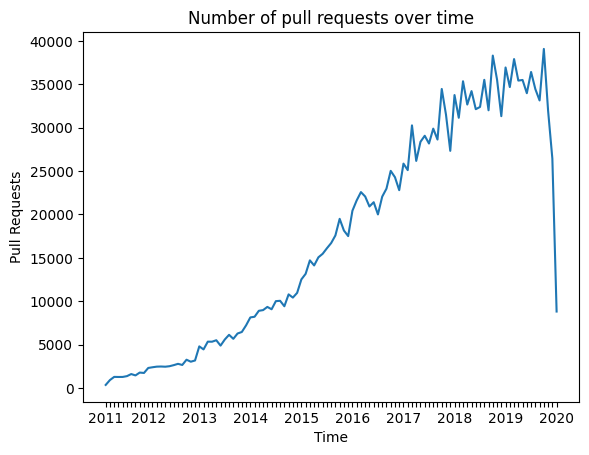

In [6]:
dates = pd.to_datetime(df['Closed At'], format="%Y-%m-%dT%H:%M:%SZ")

pr_count_per_year_month = dates.groupby(
    [dates.dt.year, dates.dt.month]).count()
axs = pr_count_per_year_month.plot(kind="line")

# Fixes x-ticks to be less cluttered.
xticks_years = []
last_year = -1
for (year, _) in pr_count_per_year_month.keys():
    if last_year != year:
        last_year = year
        xticks_years.append(year)
    else:
        xticks_years.append('')
axs.set_xticks(range(len(xticks_years)))
axs.set_xticklabels(xticks_years)

axs.set_xlabel("Time")
axs.set_ylabel("Pull Requests")
axs.set_title("Number of pull requests over time")

output_path = f'{figure_base_path}/demographics/pr_count_per_year_month.png'
safe_save_fig(output_path)

plt.show()


### Pulls per project

percentile=98
percentile_index=19650
Top project count: 402
Pull Requests below 98th percentile: 945630/1857969 (50.896%)

pulls_cap=694
capped_top_pulls_count=278988
bottom_pull_count + capped_top_pulls_count=1224618


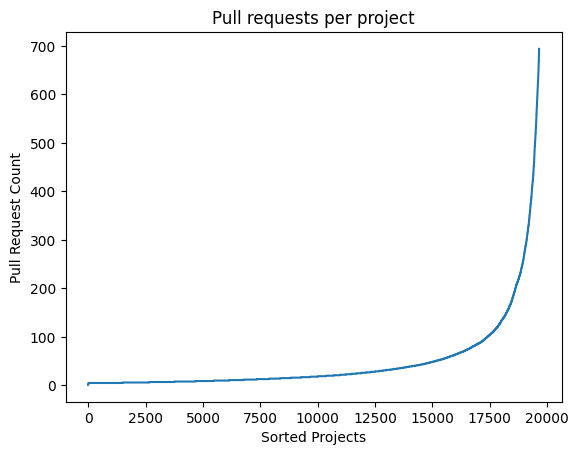

In [7]:
import math


def __plot(__df, figure_name: str):
    plt.clf()
    axs = __df.plot(kind="line", use_index=False)
    axs.set_xlabel("Sorted Projects")
    axs.set_ylabel("Pull Request Count")
    axs.set_title("Pull requests per project")
    output_path = f'{figure_base_path}/demographics/{figure_name}.png'
    safe_save_fig(output_path)


# all data plot
pr_count_per_project = dates.groupby(df['Project Name']).count()
pr_count_per_project = pr_count_per_project.sort_values()
__plot(pr_count_per_project, "prs_per_project_all")

# up to 97th Percentile plot
project_count = len(pr_count_per_project)
# NOTE: with the 74th percentile the PR counts of the capped
# elite and the rest are approximately equal. The total number
# of entries is then 479.801.
percentile = 98
print(f'{percentile=}')
percentile_index = math.floor(project_count * percentile / 100)
print(f'{percentile_index=}')
print(f'Top project count: {project_count - percentile_index}')
perc_data = pr_count_per_project.iloc[:percentile_index]
__plot(perc_data, f"prs_per_project_up_to_{percentile}th_percentile")

# Printing some stats.
total_pull_count = sum(pr_count_per_project.values)
bottom_pull_count = sum(perc_data.values)
ratio = 100 * bottom_pull_count / total_pull_count
print(f'Pull Requests below {percentile}th percentile: '
      + f'{bottom_pull_count}/{total_pull_count} ({ratio:.03f}%)\n')

# Calcualtes cap
pulls_cap = max(perc_data.values)
capped_top_pulls_count = pulls_cap * (project_count - percentile_index)
print(f'{pulls_cap=}')
print(f'{capped_top_pulls_count=}')
print(f'{bottom_pull_count + capped_top_pulls_count=}')


## Pulls per project subsampling

In [8]:
top_projects = pr_count_per_project.iloc[percentile_index:]
print(f'{len(top_projects)=}')

# Samples top projects.
df = df.groupby('Project Name').apply(lambda x: x.sample(min(pulls_cap, len(x)))
                                      if x.name in top_projects else x)

print(f'Sub-sampled df length: {len(df)}')


len(top_projects)=402
Sub-sampled df length: 1224618


## Predictor histograms

### Create Histograms for everything

In [9]:
import copy

default_plot_settings = {
    'edgecolor': 'black',
    'color': "#e69d00"
}

default_plot_settings_2 = copy.deepcopy(default_plot_settings)
default_plot_settings_2['color'] = "#56b3e9"


def __fix_x_label_fontsize(__column):
    # Adjusts x-label's fontsize to fit the text.
    fig = plt.gcf()
    fig_width = fig.get_figwidth()
    xlabel_fontsize = int(fig_width * 100 / len(__column))
    ax = plt.gca()
    orig_fontsize = ax.xaxis.label.get_fontsize()
    ax.xaxis.label.set_fontsize(min(xlabel_fontsize, orig_fontsize))


def create_histogram(_df: pd.DataFrame, _column: str,
                     subfolder_name: str = "",
                     show_without_value = None):
    can_create_feature_histograms = True

    if not can_create_feature_histograms:
        return

    binary_fields = _df.select_dtypes(exclude='number').columns

    print(_column)
    plt.clf()
    entries = _df[_column]

    if _column in binary_fields:
        entries = _df[_column].replace({False: 0, True: 1})
        plt.xticks([0, 1], ['False', 'True'])
        plt.hist(entries, bins=2, **default_plot_settings)
        plt.ylabel('Frequency')
    # elif __column in shown_fields_without_zeroes:
    elif not show_without_value is None:
        _, bins, _ = plt.hist(entries, bins=30, alpha=1,
                              label="All Data", **default_plot_settings)
        ax: plt.Axes = plt.gca()
        ax.set_ylabel("Frequency")
        ax.set_xlabel(_column)
        __fix_x_label_fontsize(_column)

        filtered_data = _df[_column][_df[_column] != show_without_value]
        ax2 = ax.twinx()

        ax2.hist(filtered_data, bins, alpha=0.5,
                 label=f'Excl. {show_without_value}', **default_plot_settings_2)
        ax2.set_ylabel(f"Frequency (excl. x = {show_without_value})")
        ax2.set_zorder(10)
        plt.tight_layout()
    else:
        plt.hist(entries, bins=30, **default_plot_settings)
        plt.ylabel('Frequency')

    plt.xlabel(_column)
    __fix_x_label_fontsize(_column)
    plt.tight_layout()

    output_path = f"{figure_base_path}/distributions/{subfolder_name}/{_column}.png"
    safe_save_fig(output_path)


def create_predictor_histograms(__df: pd.DataFrame, subfolder_name: str = ""):
    # Iterate over the columns and generate histograms
    for column in __df.columns[meta_header_count:]:
        create_histogram(__df, column, subfolder_name,
                         show_without_value=0)




PullRequestIsMerged
ControlIntegratedBySameUser
ControlPullRequestLifeTimeInMinutes
ControlPullRequestHasComments
ControlNumberOfCommitsInPullRequest
ControlHasHashTagInDescription
FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)
FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)
FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In)
FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In)
FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In)
FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRIntegratorToSubmitter-In)
FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToSubmitter-In)
FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToCommenter-In)
FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToCommenter-In)
FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToSubmitter-In)
FirstOrder

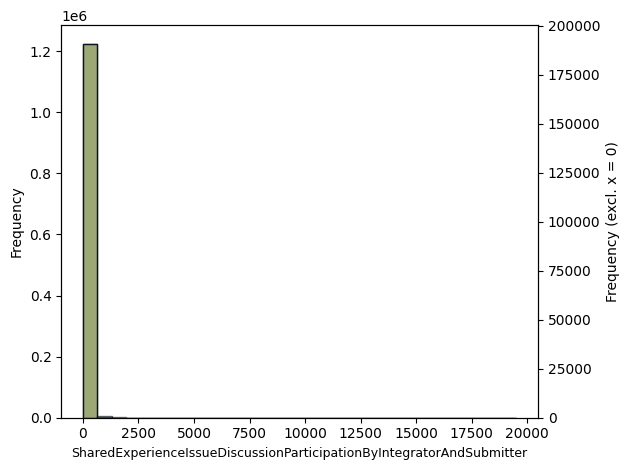

In [10]:
create_predictor_histograms(df, subfolder_name="untransformed")


### Histograms Success Rate

This is done separately as success rate has a meaningfull zero score, whereas all observations without any PR submissions are also assigned 0. 

IntraProjectSubmitterPullRequestSuccessRate
EcosystemExperienceSubmitterPullRequestSuccessRate
DependencyEcosystemExperienceSubmitterPullRequestSuccessRate
InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate


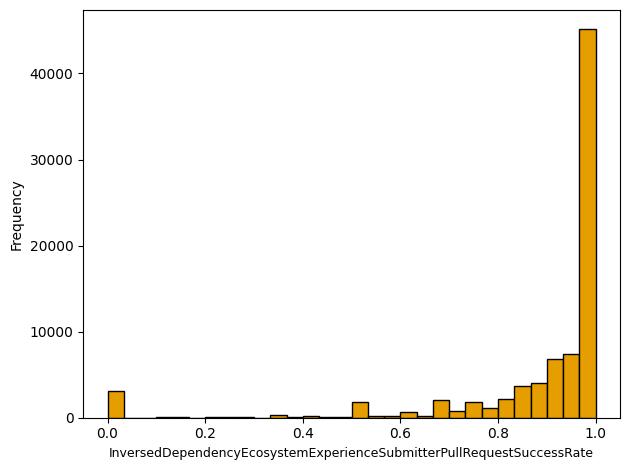

In [11]:
import regex as re

ratio_fields = [field for field in df.columns if len(
    re.findall(r'.*SuccessRate.*', field)) > 0]

for field in ratio_fields:
    related_count_field = field[:-len('SuccessRate')] + "SubmissionCount"
    tmp_df = df[df[related_count_field] != 0]
    create_histogram(tmp_df, field, subfolder_name="success_rate")


## Feature Construction

Some features are altered / rebuilt / added here.

### Centrality Feature Building

Aggregates the collected first-order centrality measures into a single weighted first-order degree centrality measure.

len(fo_degree_in_features)=25, len(fo_degree_out_features)=25.
Edge weights:
{
    "PRIntegratorToSubmitter": 0.24757886379195637,
    "PRCommenterToSubmitter": 0.24348316399717174,
    "PRCommenterToCommenter": 0.19293707610471117,
    "IssueCommenterToCommenter": 0.07947333160781547,
    "IssueCommenterToSubmitter": 0.23652756449834528
}
WeightedFirstOrderInDegreeCentrality
WeightedFirstOrderOutDegreeCentrality


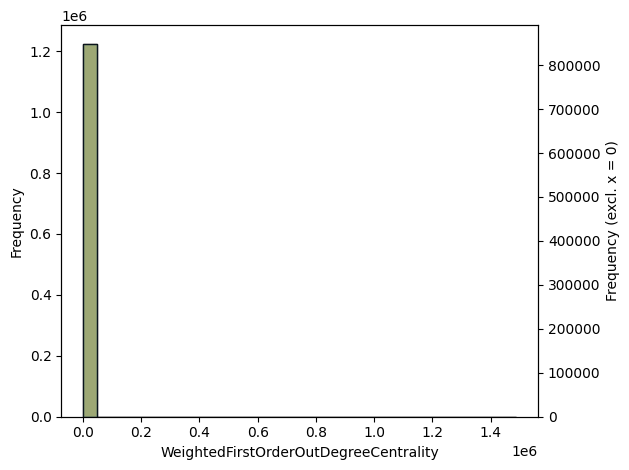

In [12]:
from functools import partial
import json
import numpy as np
import regex as re

fo_in_exp = r'.*FirstOrderDegree.*In\).*'
fo_degree_in_features = [field for field in df.columns
                         if len(list(re.findall(fo_in_exp, field))) > 0]
fo_degree_in_features = list(fo_degree_in_features)

fo_out_exp = r'.*FirstOrderDegree.*Out\).*'
fo_degree_out_features = [field for field in df.columns
                          if len(list(re.findall(fo_out_exp, field))) > 0]
fo_degree_out_features = list(fo_degree_out_features)

print(f'{len(fo_degree_in_features)=}, {len(fo_degree_out_features)=}.')

# Calculates the edge weights.
# NOTE: There's nothing automated about these numbers;
# I copy-pasted them from the terminal after running ``sliding_window_2.py`` on the dataset.
edge_counts = {
    "PRIntegratorToSubmitter": 1043559,
    "PRCommenterToSubmitter": 2808889,
    "PRCommenterToCommenter": 24595282,
    "IssueCommenterToCommenter": 73500466,
    "IssueCommenterToSubmitter": 5806894
}
total_edges = sum(edge_counts.values())

# ahp_weights = {
#     "PRIntegratorToSubmitter": 0.09,
#     "PRCommenterToSubmitter": 0.16,
#     "PRCommenterToCommenter": 0.30,
#     "IssueCommenterToCommenter": 0.16,
#     "IssueCommenterToSubmitter": 0.30
# }


def calculate_weight(value):
    percentage_complement = 1 - (value / (total_edges))
    normalized_perc_compl = percentage_complement / (len(edge_counts) - 1)
    return normalized_perc_compl


edge_weights = {key: calculate_weight(value)  # * ahp_weights[key]
                for key, value in edge_counts.items()}
total_weight = sum(edge_weights.values())
edge_weights = {key: value / total_weight for key,
                value in edge_weights.items()}

print("Edge weights:")
print(json.dumps(edge_weights, indent=4))

# Feature construction
base_field_name = 'FirstOrderDegreeCentralityV2({connecting_edge}.{experience_edge}-{direction})'


def calculate_weighted_fo_centrality(series: pd.Series, direction: str):
    centrality = 0.0
    partial_field_name = partial(base_field_name.format, direction=direction)
    for connecting_edge in edge_weights.keys():
        connection_weight = edge_weights[connecting_edge]
        for experience_edge in edge_weights.keys():
            current_field = partial_field_name(connecting_edge=connecting_edge,
                                               experience_edge=experience_edge)

            experience_weight = edge_weights[experience_edge]
            experience = series[current_field]

            centrality += connection_weight * experience_weight * experience

    return centrality


weighted_in_fod_key = "WeightedFirstOrderInDegreeCentrality"
df[weighted_in_fod_key] = df[fo_degree_in_features].apply(
    partial(calculate_weighted_fo_centrality, direction="In"), axis=1)

weighted_out_fod_key = "WeightedFirstOrderOutDegreeCentrality"
df[weighted_out_fod_key] = df[fo_degree_out_features].apply(
    partial(calculate_weighted_fo_centrality, direction="Out"), axis=1)

df[[weighted_in_fod_key, weighted_out_fod_key]].describe()
create_histogram(df, weighted_in_fod_key,
                 'weighted_fo_degree', show_without_value=0)
create_histogram(df, weighted_out_fod_key,
                 'weighted_fo_degree', show_without_value=0)


Drops the individual first-order degree centrality fields from the dataframe

In [13]:
features_to_drop = [*fo_degree_in_features, *fo_degree_out_features]
print(f'{len(features_to_drop)=}')
print(features_to_drop)
df = df.drop(features_to_drop, axis=1)


len(features_to_drop)=50
['FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In)', 'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In)', 'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRIntegratorToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToCommenter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToCommenter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRIntegratorToSubmitter-In)', 'FirstOrderDegreeCentralityV2(PRCommenterToCommenter

### Intensity feature building

IntegratorToSubmitterLinkIntensity
SubmitterToIntegratorLinkIntensity


,IntegratorToSubmitterLinkIntensity,SubmitterToIntegratorLinkIntensity
count,1.224618e+06,1.224618e+06
mean,2.338673e+00,3.092827e+00
std,2.107681e+01,2.168998e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,4.768400e-01
max,4.436984e+03,4.238017e+03


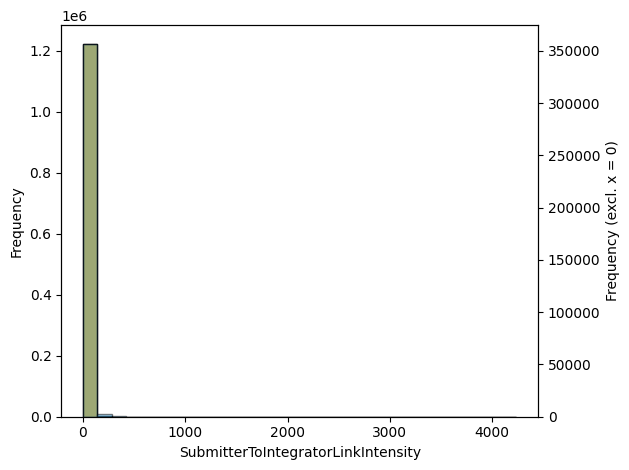

In [14]:

sub_to_int_fields = [
    "SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator",
    "SharedExperiencePullRequestSubmittedBySubmitterCommentedOnByIntegrator",
    'SharedExperiencePullRequestDiscussionParticipationByIntegratorAndSubmitter',
    'SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter',
    'SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator',
]

int_to_sub_fields = [
    'SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter',
    'SharedExperiencePullRequestSubmittedByIntegratorCommentedOnBySubmitter',
    'SharedExperiencePullRequestDiscussionParticipationByIntegratorAndSubmitter',
    'SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter',
    'SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter',
]


def calculate_intensity(series: pd.Series, source_fields: list[str], source_weights: list[str]):
    return sum([series[field] * weight for field, weight in zip(source_fields, source_weights)])


its_key = 'IntegratorToSubmitterLinkIntensity'
df[its_key] = df.apply(
    partial(
        calculate_intensity,
        source_fields=int_to_sub_fields,
        source_weights=edge_weights.values()
    ),
    axis=1
)
create_histogram(df, its_key,
                 subfolder_name='weighted_intensity', 
                 show_without_value=0)

tsi_key = 'SubmitterToIntegratorLinkIntensity'
df[tsi_key] = df.apply(
    partial(
        calculate_intensity,
        source_fields=sub_to_int_fields,
        source_weights=edge_weights.values()
    ),
    axis=1
)
create_histogram(df, tsi_key,
                 subfolder_name='weighted_intensity', 
                 show_without_value=0)

df[[its_key, tsi_key]].describe()


Drops shared experience / collaboration fields.

In [15]:
features_to_drop = [*sub_to_int_fields, *int_to_sub_fields]
print(f'{len(features_to_drop)=}')
print(features_to_drop)
df = df.drop(features_to_drop, axis=1)

len(features_to_drop)=10
['SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator', 'SharedExperiencePullRequestSubmittedBySubmitterCommentedOnByIntegrator', 'SharedExperiencePullRequestDiscussionParticipationByIntegratorAndSubmitter', 'SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter', 'SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator', 'SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter', 'SharedExperiencePullRequestSubmittedByIntegratorCommentedOnBySubmitter', 'SharedExperiencePullRequestDiscussionParticipationByIntegratorAndSubmitter', 'SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter', 'SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter']


## Transformation

To account for the assumptions of logistic regression, data needs to be transformed somehow.

### Test for log-normality

ln(e + ControlPullRequestLifeTimeInMinutes)
ln(e + ln(e + ControlPullRequestLifeTimeInMinutes))
ln(e + ControlNumberOfCommitsInPullRequest)
ln(e + ln(e + ControlNumberOfCommitsInPullRequest))
ln(e + ControlIntraProjectPullRequestExperienceOfIntegrator)
ln(e + ln(e + ControlIntraProjectPullRequestExperienceOfIntegrator))
ln(e + IntraProjectSubmitterPullRequestSubmissionCount)
ln(e + ln(e + IntraProjectSubmitterPullRequestSubmissionCount))
ln(e + IntraProjectSubmitterPullRequestSuccessRate)
ln(e + ln(e + IntraProjectSubmitterPullRequestSuccessRate))
ln(e + IntraProjectSubmitterPullRequestCommentCount)
ln(e + ln(e + IntraProjectSubmitterPullRequestCommentCount))
ln(e + EcosystemExperienceSubmitterPullRequestSuccessRate)
ln(e + ln(e + EcosystemExperienceSubmitterPullRequestSuccessRate))
ln(e + EcosystemExperienceSubmitterPullRequestSubmissionCount)
ln(e + ln(e + EcosystemExperienceSubmitterPullRequestSubmissionCount))
ln(e + EcosystemExperienceSubmitterPullRequestCommentCount)
ln(e + ln(e 

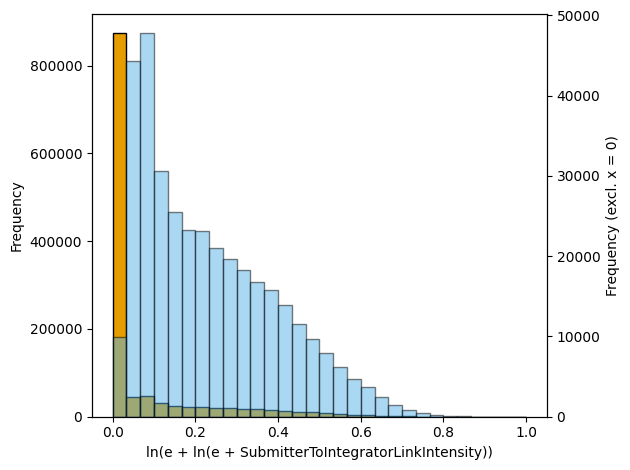

In [16]:
import numpy as np

continuous_features = df[df.columns[meta_header_count:]]\
    .select_dtypes(include='number')

eps = 1

for feature in continuous_features:
    test_df = df.copy()
    log_feature_name = f'ln(e + {feature})'
    test_df[log_feature_name] = df[feature].apply(lambda x: np.log(eps + x))
    mn, mx = test_df[log_feature_name].min(), test_df[log_feature_name].max()
    test_df[log_feature_name] = test_df[log_feature_name].apply(lambda x: (x - mn) / (mx-mn))
    create_histogram(test_df, log_feature_name,
                     subfolder_name="log_normality_test",
                     show_without_value=0)
    
    log_log_feature_name = f"ln(e + ln(e + {feature}))"
    test_df[log_log_feature_name] = test_df[log_feature_name].apply(lambda x: np.log(eps + x))
    mn, mx = test_df[log_log_feature_name].min(), test_df[log_log_feature_name].max()
    test_df[log_log_feature_name] = test_df[log_log_feature_name].apply(lambda x: (x - mn) / (mx-mn))
    create_histogram(test_df, log_log_feature_name, 
                     subfolder_name="log_log_normality_test", 
                     show_without_value=0)


### Application of transformations

All of the fields are transformed using some method.

In [17]:
import numpy as np

df_transformed = df.copy()

meta_fields = df.columns[:meta_header_count]
count_fields = [field for field in df[df.columns[meta_header_count:]].select_dtypes(include='number').columns
                if field not in meta_fields and
                not re.match(r'.*SuccessRate.*', field)]
print(count_fields)
for field in count_fields:
    new_key = f'ln(1 + {field})'
    df_transformed[new_key] = df_transformed[field].apply(
        lambda x: np.log(1 + x))
    df_transformed = df_transformed.drop(field, axis=1)


['ControlPullRequestLifeTimeInMinutes', 'ControlNumberOfCommitsInPullRequest', 'ControlIntraProjectPullRequestExperienceOfIntegrator', 'IntraProjectSubmitterPullRequestSubmissionCount', 'IntraProjectSubmitterPullRequestCommentCount', 'EcosystemExperienceSubmitterPullRequestSubmissionCount', 'EcosystemExperienceSubmitterPullRequestCommentCount', 'DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount', 'DependencyEcosystemExperienceSubmitterPullRequestCommentCount', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount', 'InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount', 'IntraProjectSubmitterIssueSubmissionCount', 'IntraProjectSubmitterIssueCommentCount', 'EcosystemExperienceSubmitterIssueSubmissionCount', 'EcosystemExperienceSubmitterIssueCommentCount', 'DependencyEcosystemExperienceSubmitterIssueSubmissionCount', 'DependencyEcosystemExperienceSubmitterIssueCommentCount', 'InversedDependencyEcosystemExperienceSubmitterIssueSubmission

### Scaling

['ControlPullRequestLifeTimeInMinutes', 'ControlNumberOfCommitsInPullRequest', 'ControlIntraProjectPullRequestExperienceOfIntegrator', 'IntraProjectSubmitterPullRequestSubmissionCount', 'IntraProjectSubmitterPullRequestSuccessRate', 'IntraProjectSubmitterPullRequestCommentCount', 'EcosystemExperienceSubmitterPullRequestSuccessRate', 'EcosystemExperienceSubmitterPullRequestSubmissionCount', 'EcosystemExperienceSubmitterPullRequestCommentCount', 'DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount', 'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'DependencyEcosystemExperienceSubmitterPullRequestCommentCount', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount', 'IntraProjectSubmitterIssueSubmissionCount', 'IntraProjectSubmitterIssueCommentCount', 'EcosystemExperienceSubmitterIssueSubmissionCou

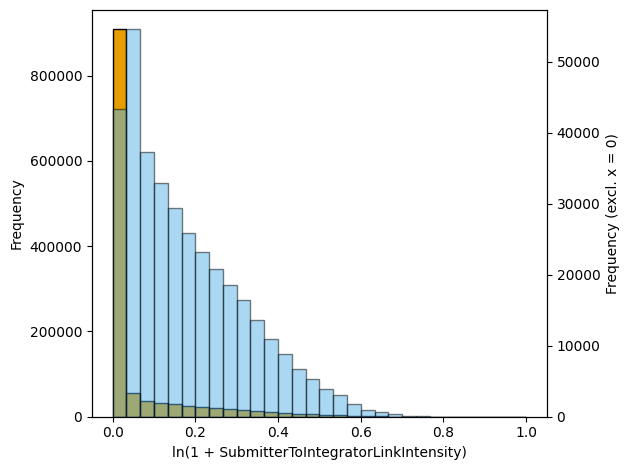

In [18]:
def scale(_df: pd.DataFrame, scaled_fields: pd.Series):
    scaled_df = _df.copy()
    # continuous_features = _df.copy().select_dtypes(include='number')

    for feature in scaled_fields:
        mn = scaled_df[feature].min()
        mx = scaled_df[feature].max()
        scaled_df[feature] = scaled_df[feature].apply(
            lambda x: (x - mn) / (mx - mn))

    create_predictor_histograms(scaled_df, subfolder_name="final_scaled")

    return scaled_df


meta_headers = df.columns[:meta_header_count]
scaled_fields = [field for field in df.select_dtypes(include='number').columns
                 if field not in meta_headers]
print(scaled_fields)
df = scale(df, scaled_fields)


scaled_fields = [field for field in df_transformed.select_dtypes(include='number').columns
                 if field not in meta_headers]
print(scaled_fields)
df_transformed = scale(df_transformed, scaled_fields)


In [19]:
df_transformed.describe()


,ID,Submitter ID,PR Number,IntraProjectSubmitterPullRequestSuccessRate,EcosystemExperienceSubmitterPullRequestSuccessRate,DependencyEcosystemExperienceSubmitterPullRequestSuccessRate,InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate,ln(1 + ControlPullRequestLifeTimeInMinutes),ln(1 + ControlNumberOfCommitsInPullRequest),ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator),...,ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + EcosystemExperienceSubmitterIssueCommentCount),ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + WeightedFirstOrderInDegreeCentrality),ln(1 + WeightedFirstOrderOutDegreeCentrality),ln(1 + IntegratorToSubmitterLinkIntensity),ln(1 + SubmitterToIntegratorLinkIntensity)
count,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,...,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06,1.224618e+06
mean,1.474104e+08,5.087300e+06,8.080923e+02,5.031013e-01,4.032540e-01,9.882094e-02,5.953175e-02,4.192976e-01,1.184296e-01,2.984782e-01,...,8.726324e-02,1.451388e-01,1.150196e-02,1.973971e-02,9.569506e-03,1.758172e-02,8.878103e-02,7.428789e-02,3.903805e-02,5.337053e-02
std,9.957257e+07,7.969978e+06,2.292724e+03,4.710845e-01,4.524457e-01,2.910766e-01,2.290649e-01,2.256891e-01,7.158783e-02,1.868668e-01,...,1.245159e-01,1.815244e-01,5.413982e-02,8.015734e-02,5.263800e-02,8.247032e-02,1.049912e-01,9.857204e-02,9.880495e-02,1.124856e-01
min,6.870000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.928717e+07,4.655820e+05,5.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.362567e-01,7.525668e-02,1.658001e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.369259e+08,1.628168e+06,1.990000e+02,6.875000e-01,0.000000e+00,0.000000e+00,0.000000e+00,4.430193e-01,7.525668e-02,2.971935e-01,...,0.000000e+00,7.753347e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.422832e-02,3.546431e-02,0.000000e+00,0.000000e+00
75%,2.262247e+08,6.249983e+06,6.840000e+02,1.000000e+00,9.393939e-01,0.000000e+00,0.000000e+00,5.859370e-01,1.505134e-01,4.381600e-01,...,1.416667e-01,2.575606e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.365610e-01,1.117056e-01,0.000000e+00,4.668350e-02
max,3.617734e+08,5.973444e+07,8.297600e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Rare Event Handling

### Predictor Zero Counts

Counts how many fields have partial zero data to see if they are worth including in this study

In [20]:
import regex as re
from typing import Callable


def count_zeroes(_df: pd.DataFrame):
    zeroes = pd.DataFrame()
    zeroes['zeroes'] = _df.eq(0).sum()
    zeroes['non_zeroes'] = len(_df) - zeroes['zeroes']
    zeroes['percentage_zeroes'] = (zeroes['zeroes'] / len(_df)) * 100

    binary_fields = _df.select_dtypes(exclude='number').columns
    ratio_fields = [field for field in _df.columns if len(
        re.findall(r'.*SuccessRate.*', field)) > 0]

    def get_fields_with_requirements(req: Callable[[str, dict], bool]) -> list[str]:
        included_rows = []
        for name, row_data in zeroes.iterrows():
            # We're only interested in continuous data here.
            # The ratio fields have a meaningful 0.
            if name in binary_fields or name in ratio_fields:
                continue

            if req(name, row_data):
                included_rows.append(name)
                print(
                    f'{name}: {row_data["zeroes"]:.0f} zeroes, {row_data["non_zeroes"]:.0f} non-zeroes ({row_data["percentage_zeroes"]:.03f}% zeroes).')

        return included_rows

    rare_cutoff = 80
    print(f"\nRare events ({rare_cutoff}+% zeroes):")
    rare_events = get_fields_with_requirements(lambda _, row_data:
                                               row_data['percentage_zeroes'] > rare_cutoff)

    print("\nNon-rare events:")
    non_rare_events = get_fields_with_requirements(lambda name, _:
                                                   name not in rare_events)

    return rare_events, non_rare_events


### Rare events over all data

In [21]:
rare_events, non_rare_events = count_zeroes(df)

print("\nEvent counts:")
print(f'{len(rare_events)=}')
print(f'{len(non_rare_events)=}')


Rare events (80+% zeroes):
DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount: 1088969 zeroes, 135649 non-zeroes (88.923% zeroes).
DependencyEcosystemExperienceSubmitterPullRequestCommentCount: 1107484 zeroes, 117134 non-zeroes (90.435% zeroes).
InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount: 1142297 zeroes, 82321 non-zeroes (93.278% zeroes).
InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount: 1149451 zeroes, 75167 non-zeroes (93.862% zeroes).
DependencyEcosystemExperienceSubmitterIssueSubmissionCount: 1155178 zeroes, 69440 non-zeroes (94.330% zeroes).
DependencyEcosystemExperienceSubmitterIssueCommentCount: 1130837 zeroes, 93781 non-zeroes (92.342% zeroes).
InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount: 1173639 zeroes, 50979 non-zeroes (95.837% zeroes).
InversedDependencyEcosystemExperienceSubmitterIssueCommentCount: 1155828 zeroes, 68790 non-zeroes (94.383% zeroes).

Non-rare events:
ID: 0 zeroes, 122461

### Rare events for any variable.

In [22]:
import regex as re

df.select_dtypes(include='number')
independent_fields = [field for field in df.columns[meta_header_count:]
                      if len(list(re.findall(r'.*Control.*', field))) == 0]
print(independent_fields)
independent_df = df[df[independent_fields].gt(0).any(axis=1)]
print(f'{len(independent_df)=}\n')

rare_events, non_rare_events = count_zeroes(independent_df)

print("\nEvent Counts:")
print(f'{len(rare_events)=}')
print(f'{len(non_rare_events)=}')


['PullRequestIsMerged', 'IntraProjectSubmitterPullRequestSubmissionCount', 'IntraProjectSubmitterPullRequestSuccessRate', 'IntraProjectSubmitterPullRequestCommentCount', 'EcosystemExperienceSubmitterPullRequestSuccessRate', 'EcosystemExperienceSubmitterPullRequestSubmissionCount', 'EcosystemExperienceSubmitterPullRequestCommentCount', 'DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount', 'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'DependencyEcosystemExperienceSubmitterPullRequestCommentCount', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount', 'IntraProjectSubmitterIssueSubmissionCount', 'IntraProjectSubmitterIssueCommentCount', 'EcosystemExperienceSubmitterIssueSubmissionCount', 'EcosystemExperienceSubmitterIssueCommentCount', 'DependencyEcosystemExperienceSubmitterIssueSubmissionCou

### Rare events over ecosystem experience

It performs the same test but now on entries that have some form of ecosystem experience.

In [23]:
import regex as re

ecosystem_fields = [field for field in df.columns[meta_header_count:] if len(list(
    re.findall(r'.*Ecosystem.*', field))) > 0]
print(ecosystem_fields)
ecosystem_df = df[df[ecosystem_fields].gt(0).any(axis=1)]
print(f'{len(ecosystem_df)=}\n')

rare_events, non_rare_events = count_zeroes(ecosystem_df)

print("\nEvent Counts:")
print(f'{len(rare_events)=}')
print(f'{len(non_rare_events)=}')

['EcosystemExperienceSubmitterPullRequestSuccessRate', 'EcosystemExperienceSubmitterPullRequestSubmissionCount', 'EcosystemExperienceSubmitterPullRequestCommentCount', 'DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount', 'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'DependencyEcosystemExperienceSubmitterPullRequestCommentCount', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount', 'EcosystemExperienceSubmitterIssueSubmissionCount', 'EcosystemExperienceSubmitterIssueCommentCount', 'DependencyEcosystemExperienceSubmitterIssueSubmissionCount', 'DependencyEcosystemExperienceSubmitterIssueCommentCount', 'InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount', 'InversedDependencyEcosystemExperienceSubmitterIssueCommentCount']
len(ecosystem_df)=799794


Rare events (80+% zeroes):
D

### Rare events in dependency ecosystems

In [24]:
import regex as re

dep_ecosystem_fields = [field for field in df.columns[meta_header_count:] if len(list(
    re.findall(r'.*DependencyEcosystem.*', field))) > 0]
print(dep_ecosystem_fields)
dep_ecosystem_df = df[df[dep_ecosystem_fields].gt(0).any(axis=1)]
print(f'{len(dep_ecosystem_df)=}\n')

rare_events, non_rare_events = count_zeroes(dep_ecosystem_df)

print("\nEvent Counts:")
print(f'{len(rare_events)=}')
print(f'{len(non_rare_events)=}')

['DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount', 'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'DependencyEcosystemExperienceSubmitterPullRequestCommentCount', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount', 'DependencyEcosystemExperienceSubmitterIssueSubmissionCount', 'DependencyEcosystemExperienceSubmitterIssueCommentCount', 'InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount', 'InversedDependencyEcosystemExperienceSubmitterIssueCommentCount']
len(dep_ecosystem_df)=223035


Rare events (80+% zeroes):

Non-rare events:
ID: 0 zeroes, 223035 non-zeroes (0.000% zeroes).
Submitter ID: 0 zeroes, 223035 non-zeroes (0.000% zeroes).
PR Number: 0 zeroes, 223035 non-zeroes (0.000% zeroes).
ControlPullRequestLifeTimeInMinutes: 2 zeroes, 223033 non-zeroes (0.001% zeroes).
C

### Rare events in shared experience

In [25]:
import regex as re

shared_experience_fields = [field for field in df.columns[meta_header_count:]
                            if len(list(re.findall(r'.*SharedExperience.*', field))) > 0]
print(shared_experience_fields)
shared_experience_df = df[df[shared_experience_fields].gt(0).any(axis=1)]
print(f'{len(shared_experience_df)=}\n')

rare_events, non_rare_events = count_zeroes(dep_ecosystem_df)

print("\nEvent Counts:")
print(f'{len(rare_events)=}')
print(f'{len(non_rare_events)=}')


[]
len(shared_experience_df)=0


Rare events (80+% zeroes):

Non-rare events:
ID: 0 zeroes, 223035 non-zeroes (0.000% zeroes).
Submitter ID: 0 zeroes, 223035 non-zeroes (0.000% zeroes).
PR Number: 0 zeroes, 223035 non-zeroes (0.000% zeroes).
ControlPullRequestLifeTimeInMinutes: 2 zeroes, 223033 non-zeroes (0.001% zeroes).
ControlNumberOfCommitsInPullRequest: 365 zeroes, 222670 non-zeroes (0.164% zeroes).
ControlIntraProjectPullRequestExperienceOfIntegrator: 17687 zeroes, 205348 non-zeroes (7.930% zeroes).
IntraProjectSubmitterPullRequestSubmissionCount: 46237 zeroes, 176798 non-zeroes (20.731% zeroes).
IntraProjectSubmitterPullRequestCommentCount: 70708 zeroes, 152327 non-zeroes (31.703% zeroes).
EcosystemExperienceSubmitterPullRequestSubmissionCount: 12916 zeroes, 210119 non-zeroes (5.791% zeroes).
EcosystemExperienceSubmitterPullRequestCommentCount: 22093 zeroes, 200942 non-zeroes (9.906% zeroes).
DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount: 87386 zeroes, 135649 

## Finalization

### Stores processed data file

In [26]:
def store_dataset(_df: pd.DataFrame(), file_name: str):
    _df.describe()
    output_path = data_path_format.format(data_file_name=file_name)
    print(f'Outputting to "{output_path}".')
    _df.to_csv(output_path)
    print(f"Done storing to '{output_path}'.")


store_dataset(df, f'{data_file_name}_untransformed')
store_dataset(df_transformed, f'{data_file_name}_preprocessed')

Outputting to "/workspaces/msc_thesis/data//final_data/dataset_90_days_started_11_07_23_untransformed.csv".
Done storing to '/workspaces/msc_thesis/data//final_data/dataset_90_days_started_11_07_23_untransformed.csv'.
Outputting to "/workspaces/msc_thesis/data//final_data/dataset_90_days_started_11_07_23_preprocessed.csv".
